# <center>机器视觉精品课程-卷积神经网络部分</center>

### 授课内容
- **基础概念回顾与拓展、梯度反向传播、交叉损失熵、Softmax回归、卷积神经网络**
- 对上节课内容有问题的先提出进行讲解或者为本节课内容

<img src="images/深度学习/幻灯片4.JPG" alt="幻灯片" style="zoom:120%;" />

<img src="images/深度学习/幻灯片5.JPG" alt="幻灯片" style="zoom:120%;" />

<img src="images/深度学习/幻灯片6.JPG" alt="幻灯片" style="zoom:120%;" />

- nn:neural network
- Sequential:顺序容器
- Linear(m,n):m个输入，n个输出的1层神经网络，其中n也可以代表这一层有多少个神经元

In [1]:
import numpy as np
import torch

def step_func(x): # 参数x可以接受numpy数组
    y = x >= 0 # y是布尔型数组
    return y.type(torch.int)
# 定义单个神经元 2输入
net = torch.nn.Sequential(torch.nn.Linear(2,1)) 

# 定义权重
w = torch.tensor([1,1]).type(torch.float32)
b = -2

net[0].weight.data = w.reshape(net[0].weight.shape)
net[0].bias.data.fill_(b)

# 验证输出
x = torch.tensor([1.0, 1.0]).type(torch.float32)
print('The result of 1 and 1 is', step_func(net.forward(x)).item())
x = torch.tensor([0, 1.0]).type(torch.float32)
print('The result of 1 and 1 is', step_func(net.forward(x)).item())
x = torch.tensor([0, 0]).type(torch.float32)
print('The result of 1 and 1 is', step_func(net.forward(x)).item())

torch.matmul(x, w) + b

The result of 1 and 1 is 1
The result of 1 and 1 is 0
The result of 1 and 1 is 0


tensor(-2.)

#### 神经网络是基于感知机的扩展，而DNN（deep-neural-networks）可以理解为有很多隐藏层的神经网络。多层神经网络和深度神经网络DNN其实也是指的一个东西，DNN有时也叫做多层感知机（Multi-Layer perceptron,MLP）。

<img src="images/深度学习/幻灯片7.JPG" alt="幻灯片" style="zoom:120%;" />

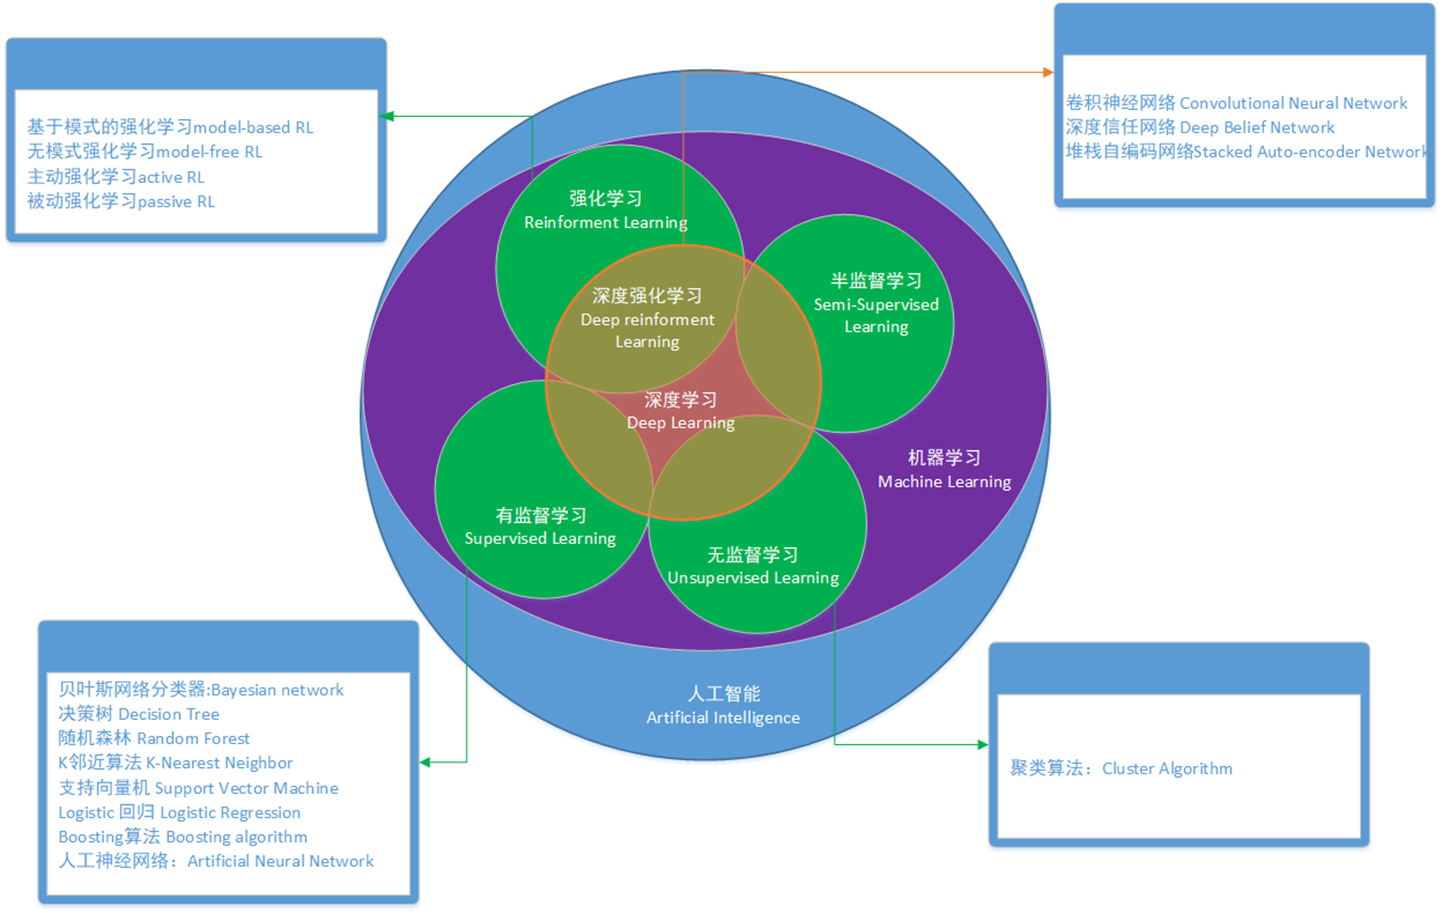

<img src="images/深度学习/幻灯片9.JPG" alt="幻灯片" style="zoom:120%;" />

<img src="images/深度学习/幻灯片14.JPG" alt="幻灯片" style="zoom:120%;" />

<img src="images/深度学习/幻灯片15.JPG" alt="幻灯片" style="zoom:120%;" />

<img src="images/深度学习/幻灯片16.JPG" alt="幻灯片" style="zoom:120%;" />

### 梯度下降

- 用到一种名为*梯度下降*（gradient descent）的方法，这种方法几乎可以优化所有深度学习模型。
- 它通过不断地在损失函数递减的方向上更新参数来降低误差。
- 梯度下降最简单的用法是计算损失函数（数据集中所有样本的损失均值）关于模型参数的导数（在这里也可以称为梯度）。

- 我们用下面的数学公式来表示这一更新过程（$\partial$表示偏导数）：

$$
(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \mathcal{lr}\sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b).
\\
y = f(w) \approx f(w_0) + f'(w_0)\Delta w \rightarrow \Delta y = f'(w_0)\Delta w \\
if \ \  \Delta w = - lr*f'(w_0) (lr > 0 ), \Delta y = -lr*f'^2(w_0) < 0
$$


总结一下，算法的步骤如下：

（1）初始化模型参数的值，如随机初始化；

（2）利用数据集在负梯度的方向上更新参数，并不断迭代这一步骤。

<img src="images/深度学习/幻灯片17.JPG" alt="幻灯片" style="zoom:120%;" />

### Dropout
- 过拟合相当于一条道走到黑，加入dropout，它强迫一个神经单元，和随机挑选出来的其他神经单元共同工作，达到好的效果。消除减弱了神经元节点间的联合适应性，增强了泛化能力。
- 过拟合中无限逼近某个噪声点，dropout将它从这个过程中拉出来
### 正则化
- J(θ)+λR(w)

<img src="images/深度学习/幻灯片18.JPG" alt="幻灯片" style="zoom:120%;" />

<img src="images/深度学习/幻灯片19.JPG" alt="幻灯片" style="zoom:120%;" />

- torchvision 中的 transforms 模块可以针对每张图像进行预处理操作
- [ILLUSTRATION OF TRANSFORMS](https://pytorch.org/vision/stable/auto_examples/plot_transforms.html?highlight=transform)
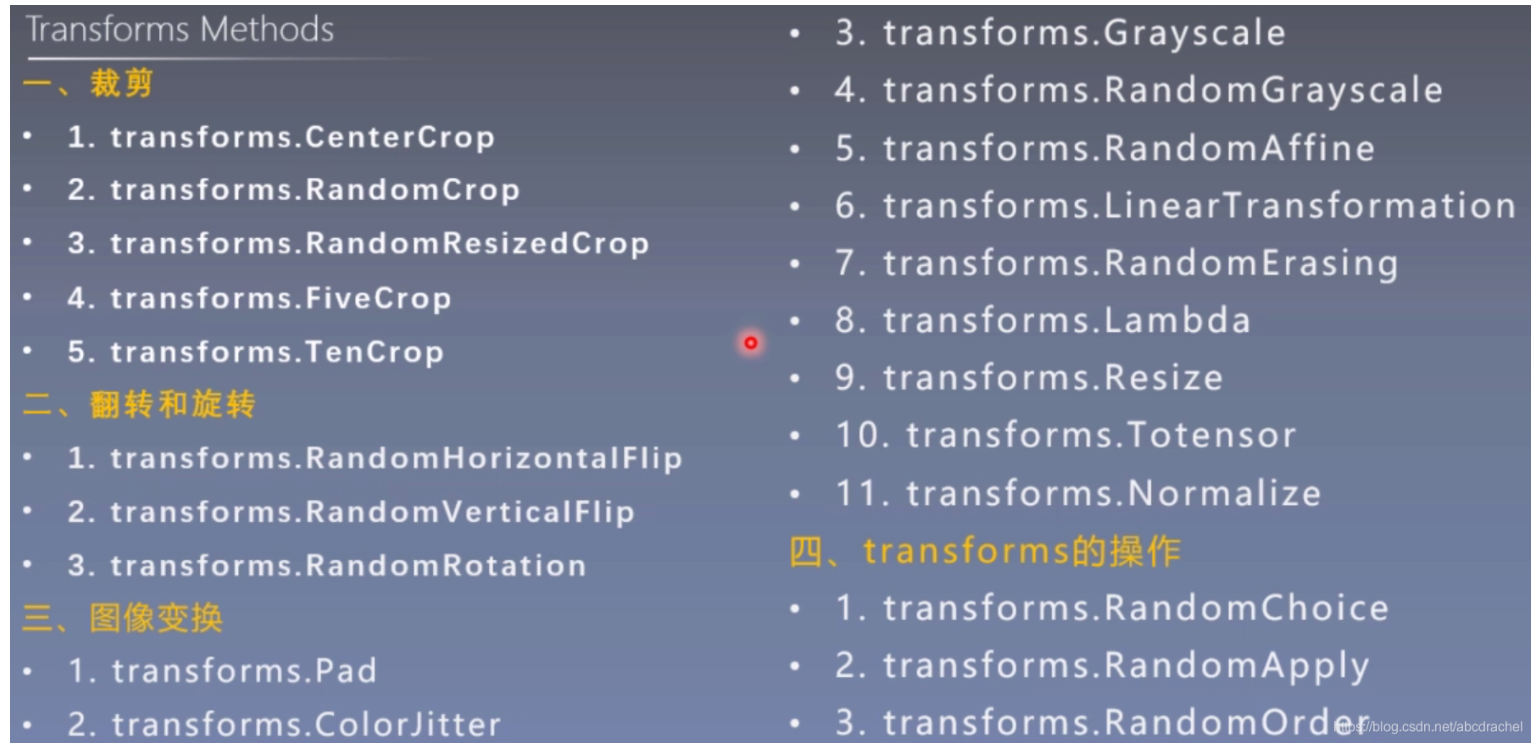

In [2]:
from torchvision import transforms # 图像变换、数据预处理
import cv2
import matplotlib.pyplot as plt
#Compose是一个容器，传入的参数是列表，ToTensor()，类型变换，Normalize是数据标准化，去均值，除标准差
# transforms.ToTensor() 把取值[0, 255]的PIL图像形状为[H,W,C]转换为形状[C,H,W] 取值范围[0,1.0]的张量
# transforms.RandomRotation(degrees=(0, 180))
transform = transforms.Compose([transforms.ToTensor(),transforms.RandomPerspective(distortion_scale=0.6, p=1.0),transforms.RandomRotation(degrees=(0, 180))])

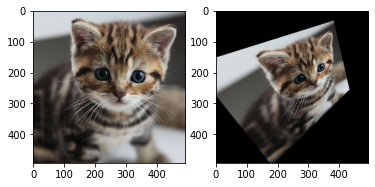

In [3]:
cat_bgr = cv2.imread(r'./images/cat.jpg')
cat_rgb = cv2.cvtColor(cat_bgr, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(cat_rgb)
cat_trans = transform(cat_rgb)
plt.subplot(1,2,2)
plt.imshow(cat_trans.numpy().transpose((1,2,0)))

## 梯度反向传播（Back Propagation，BP）
- 参考链接：[Back Propagation（梯度反向传播）实例讲解](https://zhuanlan.zhihu.com/p/40378224)
- 为什么要求梯度？
- 求关于谁的梯度？


### 损失函数

#### 均方误差 MSE（mean squared error）

在我们开始考虑如何用模型*拟合*（fit）数据之前，我们需要确定一个拟合程度的**度量**。
- *损失函数*（loss function）能够量化目标的*实际*值与*预测*值之间的差距。
- 通常我们会选择**非负数**作为损失，且数值越小表示损失越小，完美预测时的损失为0。
- 回归问题中最常用的损失函数是平方误差函数。
- 当样本$i$的预测值为$\hat{y}^{(i)}$，其相应的真实标签为$y^{(i)}$时，
平方误差可以定义为以下公式：

$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.$$

- 为了度量模型在整个数据集上的质量，我们需计算在训练集$n$个样本上的损失均值（也等价于求和）。

$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

- 在训练模型时，我们希望寻找一组参数（$\mathbf{w}^*, b^*$），这组参数能最小化在所有训练样本上的总损失。如下式：

$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$

#### 梯度下降法（SGD, Stochastic Gradient Descent）
$$
w^{+}=w-\eta \cdot \frac{\partial L}{\partial w}
$$

### 理论依据
#### 自动求导/数值求导
$$
\frac{\partial f(x)}{\partial x}=\lim _{h \rightarrow 0} \frac{f(x+h)-f(x)}{h}
$$
#### 链式法则
$$
y=f(u), u=g(x) \quad \frac{\partial y}{\partial x}=\frac{\partial y}{\partial u} \frac{\partial u}{\partial x}
$$
#### 举例
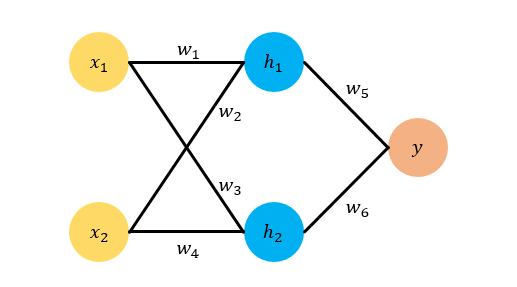
- 误差
$$
E=\frac{1}{2}(y-t)^{2}
$$
- 更新$w_{5}$
$$
\frac{\partial E}{\partial w_{5}}=\frac{\partial E}{\partial y} \cdot \frac{\partial y}{\partial w_{5}}  \\
w_{5}^{+}=w_{5}-\eta \cdot \frac{\partial E}{\partial w_{5}}
$$
- 更新$w_{1}$
$$
\frac{\partial E}{\partial w_{1}}=\frac{\partial E}{\partial y} \cdot \frac{\partial y}{\partial h_{1}} \cdot \frac{\partial h_{1}}{\partial w_{1}} \\
w_{1}^{+}=w_{1}-\eta \cdot \frac{\partial E}{\partial w_{1}}
$$

In [4]:
import numpy as np
import torch
# 定义单个神经元 2输入
net = torch.nn.Sequential(torch.nn.Linear(2,2),torch.nn.Linear(2,1)) 

# 定义权重
net[0].weight.data = torch.tensor([1,2,3,4]).type(torch.float32).reshape(net[0].weight.shape)
net[1].weight.data = torch.tensor([0.5,0.6]).type(torch.float32).reshape(net[1].weight.shape)

net[0].bias.data.fill_(0)
net[1].bias.data.fill_(0)

x = torch.tensor([1.0, 0.5]).type(torch.float32)
net(x)

tensor([4.], grad_fn=<AddBackward0>)

In [5]:
# 数值求导举例
# 定义权重
net[0].weight.data = torch.tensor([0.5,1.5,2.3,3]).type(torch.float32).reshape(net[0].weight.shape)
net[1].weight.data = torch.tensor([1,1]).type(torch.float32).reshape(net[1].weight.shape)
# y1 = 0.5*(4-net(x).item())**2
y1 = net(x).item()
dx = 0.001
net[0].weight.data = torch.tensor([0.5,1.5,2.3,3]).type(torch.float32).reshape(net[0].weight.shape)
net[1].weight.data = torch.tensor([1+dx,1]).type(torch.float32).reshape(net[1].weight.shape)
# y2 = 0.5*(4-net(x).item())**2
y2 = net(x).item()
(y2-y1)/dx

1.2497901916503906

In [6]:
# 数值求导举例 y = x^T * x
import torch
x = torch.arange(4.0)
x.requires_grad_(True)
y = 2 * torch.dot(x, x)

y.backward()
x.grad,x.grad == 4 * x

(tensor([ 0.,  4.,  8., 12.]), tensor([True, True, True, True]))

## Softmax激活函数
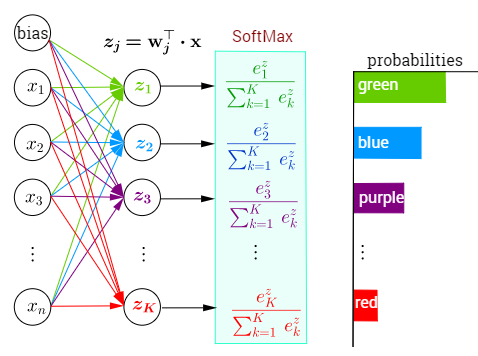
- 现在我们将优化参数以最大化观测数据的概率。
- 为了得到预测结果，我们将设置一个阈值，如选择具有最大概率的标签。
- 我们希望模型的输出$\hat{y}_j$可以视为属于类$j$的概率，然后选择具有最大输出值的类别$\operatorname*{argmax}_j y_j$作为我们的预测。
 - 例如，如果$\hat{y}_1$、$\hat{y}_2$和$\hat{y}_3$分别为0.1、0.8和0.1，那么我们预测的类别是2，在我们的例子中代表“鸡”。
- 社会科学家邓肯·卢斯于1959年在*选择模型*（choice model）的理论基础上发明的*softmax函数* 如下式：

$$\hat{\mathbf{y}} = \mathrm{softmax}(\mathbf{o})\quad \text{其中}\quad \hat{y}_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)}$$

## 交叉熵损失函数
- 一般用于分类问题
$$H(p, q)=-\sum_{x} p(x) \log q(x)$$
- 交叉熵刻画的是两个概率分布之间的距离， p代表正确答案， q代表的是预测值，交叉熵越小，两个概率的分布约接近

### 举例
- 假设有一个3分类问题，某个样例的正确答案是（1， 0， 0）
- 甲模型经过softmax回归之后的预测答案是（0.5， 0.2， 0.3）
- 乙模型经过softmax回归之后的预测答案是（0.7， 0.1， 0.2）

$$
        l_n = - \log \frac{\exp(x_{n,y_n})}{\sum_{c=1}^C \exp(x_{n,c})},   y_n = y_{target}
$$

In [7]:
import torch
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])


X_prob, X_prob.sum(1),y_hat[[0, 1], y],cross_entropy(y_hat, y)

(tensor([[0.0369, 0.0550, 0.0587, 0.5402, 0.3092],
         [0.2373, 0.6351, 0.0845, 0.0074, 0.0357]]),
 tensor([1.0000, 1.0000]),
 tensor([0.1000, 0.5000]),
 tensor([2.3026, 0.6931]))

## 卷积神经网络
- 深度学习是指多层神经网络上运用各种机器学习算法解决图像，文本等各种问题的算法集合。
- 深度学习的核心是特征学习，旨在通过分层网络获取分层次的特征信息，从而解决以往需要人工设计特征的重要难题。
- 人类的视觉原理如下：
 - 从原始信号摄入开始（瞳孔摄入像素 Pixels）
 - 接着做初步处理（大脑皮层某些细胞发现边缘和方向）
 - 然后抽象（大脑判定，眼前的物体的形状，是圆形的）
 - 然后进一步抽象（大脑进一步判定该物体是只气球）。
 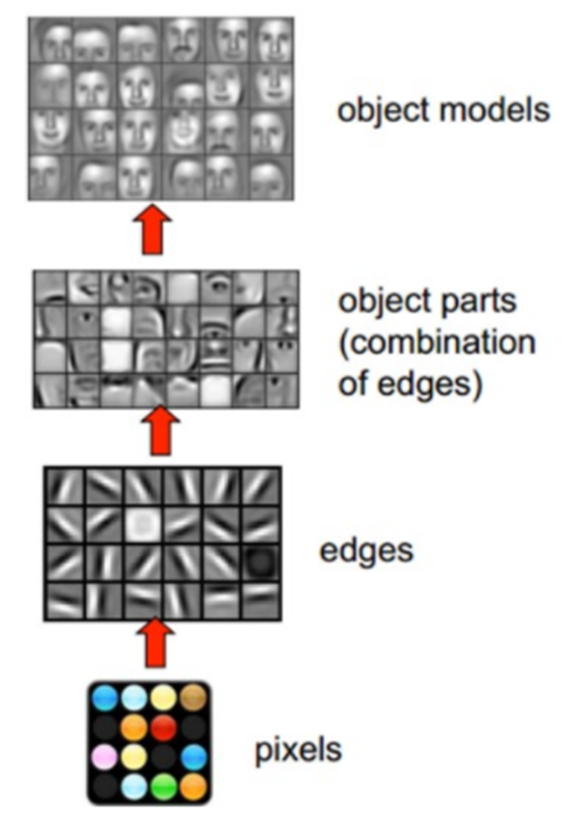

### 概念
- 卷积神经网络是一种多层神经网络，擅长处理图像特别是大图像的相关机器学习问题。CNN通过卷积来模拟特征区分，并且通过卷积的权值共享及池化，来**降低网络参数的数量级**，最后通过传统神经网络完成分类等任务。
- 卷积神经网络是一种自动化特征提取的机器学习模型，主要用于解决图像识别问题。
- 从直观上讲，是一个从细节到抽象的过程。这里的关键是如何抽象，抽象就是把图像中的各种零散的特征通过某种方式汇总起来，形成新的特征。深度学习网络最上层的特征是最抽象的。

#### 降低网络参数数量级
- 神经网络结构 : 在该结构中, 输入是一个向量，然后在一系列的隐层中对它做变换, 如果一个尺寸为200x200x3的图像，采用全连接方式会让每个神经元包含200x200x3=120,000个权重值, 这种全连接方式效率低下，大量的参数也很快会导致网络过拟合。

### 卷积层：整合输入数据并从中提取有效数据，得到特征图。
- 在这个卷积层，有两个关键操作：局部关联与窗口滑动。局部关联将每个神经元看作一个滤波器，窗口滑动则是使用滤波器对局部数据计算。
- 局部感知：人的大脑识别图片的过程中，并不是一下子整张图同时识别，而是对于图片中的每一个特征首先局部感知，然后更高层次对局部进行综合操作，从而得到全局信息。
- 卷积运算一个重要的特点就是，通过卷积运算，可以使原信号特征增强，并且降低噪音
- 这个过程我们可以理解为我们使用一个过滤器（卷积核）来过滤图像的各个小区域，从而得到这些小区域的特征值。
- 在实际训练过程中，卷积核的值是在学习过程中学到的。

<img src="images/深度学习/幻灯片22.JPG" alt="幻灯片" style="zoom:120%;" />

- 使用多个滤波器，可以通过卷积将一维的输入变为四维，每一维代表一个特征。
- 每个卷积核的大小都是3维（x * y * n），代表长、宽和输入的深度，而其本身的深度是指卷积核个数，设为 k ，则该层卷积核参数个数为（x * y * n * k）
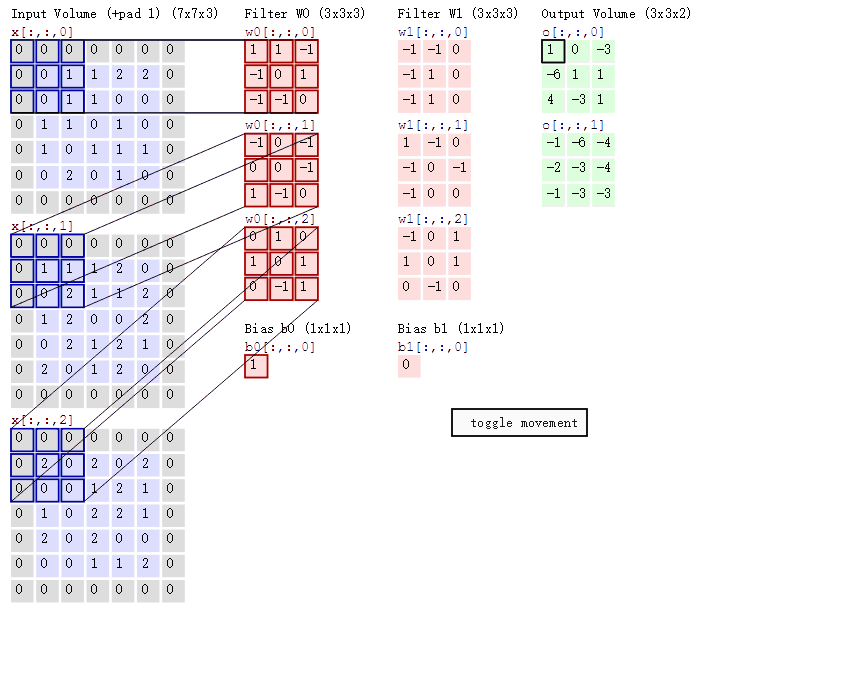

### 池化层（降采样层）：池化层能够压缩数据，提取明显特征。

<img src="images/深度学习/幻灯片23.JPG" alt="幻灯片" style="zoom:120%;" />

- 池化层位于连续的卷积层中间，本身没有可训练的参数。池化层的目的在于对卷积层提取的特征进行降维，减少整个神经网络的参数。
- **感受野：一个像素对应回原图的区域大小，假如没有pooling，一个$3*3$，步长为1的卷积，那么输出的一个像素的感受野就是$3*3$的区域，再加一个stride=1的$3*3$卷积，则感受野为$5*5$。**

### 全连接层：将两层之间所有神经元都有权重连接。

<img src="images/深度学习/幻灯片24.JPG" alt="幻灯片" style="zoom:120%;" />

- 全连接层将两层之间所有神经元都有权重连接，通常全连接层在卷积神经网络尾部，与传统的神经网络神经元的连接方式是一样的。
- 经过几轮卷积和池化操作，可以认为图像中的信息已经被**抽象成了信息含量更高的特征**。我们可以将卷积和池化看成自动图像提取的过程，在特征提取完成后，仍然需要使用全连接层来完成分类任务

## 实用举例

In [8]:
!pip install torchsummary

### 引入需要的库

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import time
import torch.optim as optim

import torchvision
import torch.utils.data as Data
import torchvision.transforms as transforms
from torchvision.datasets import MNIST,FashionMNIST
print('GPU useable state: ',torch.cuda.is_available())

GPU useable state:  False


### 加载数据

In [10]:
transform = transforms.Compose(
    [transforms.ToTensor()]) 
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])



# MNIST
data_train = MNIST(root = "data/", ## 数据的路径，如果存在数据则加载，否则下载至此路径
                            transform = transform, ## 图像变换操作
                            train =True, ## 决定使用训练集还是测试集
                            download = True) ## 选择是否需要下载数据
data_test = MNIST(root = "data/",
                            transform = transform,
                            train =False)
## 定义数据加载器
batch_size = 256
train_loader = Data.DataLoader(dataset = data_train, ## 使用的数据集
                                            batch_size = batch_size, ## 批处理样本大小
                                            shuffle = True ## 是否打乱数据顺序
                                            )
test_loader = Data.DataLoader(dataset = data_test,
                                            batch_size = batch_size,
                                            shuffle = True  #将顺序随机打乱
                                            )

### 定义网络模型
#### 卷积神经网络模型

In [11]:
class ConvNet(nn.Module):
    def __init__(self, ch = 3, h = 32, w = 32):
        super(ConvNet, self).__init__()
        # 3 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels = ch, 
                out_channels = 6, 
                kernel_size = 5), ## (N*1* h * w ) ==> (N*6* (h-4) * (w-4))
            nn.ReLU(),            
            nn.AvgPool2d(
                kernel_size = 2,
                stride = 2)       ## (N*6* (h-4) * (w-4)) ==> (N*6* (w-4)/2 * (w-4)/2)
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(6, 16, 5),  ## (N*6* (h-4)/2 * (w-4)/2) ==> (N*16* (h-4)/2-4 * (w-4)/2-4)
            nn.ReLU(),
            nn.AvgPool2d(2,2)     ## (N*16* (h-4)/2-4 * (w-4)/2-4) ==> (N*16* h/4 -3 * w/4 -3)
        )
        
        self.classifier = nn.Sequential(
           nn.Linear(int(16*(h/4-3)*(w/4-3)),120), # 5
           nn.ReLU(),
           nn.Linear(120,84),
           nn.ReLU(),
           nn.Linear(84,10)) 

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = self.conv1(x)
        # If the size is a square, you can specify with a single number
        x = self.conv2(x)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = self.classifier(x)
        return x

#### MLP（多层感知机、全连接网络）

In [12]:
class dnn(nn.Module):
    def __init__(self):
        super(dnn,self).__init__()
        ## 定义层
        self.flatten = nn.Flatten()
        self.hiden1 = nn.Linear(in_features = 784, out_features = 512, bias = True)
        self.active1 = nn.ReLU() ## 激活函数
        self.drop1 = nn.Dropout(p=0.2)
        self.hiden2 = nn.Linear(512,512)
        self.active2 = nn.ReLU()
        self.drop2 = nn.Dropout(p=0.2)
        self.fc = nn.Linear(512,10)
    def forward(self,x):
        x = self.flatten(x)
        x = self.hiden1(x)
        x = self.active1(x)
        x = self.drop1(x)
        x = self.hiden2(x)
        x = self.active2(x)
        x = self.drop2(x)
        x = self.fc(x)
        return x

### 实例化网络模型

In [13]:
net = dnn()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)
print(device)
from torchsummary import summary
summary(net,(1,28,28))

cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 512]         401,920
              ReLU-3                  [-1, 512]               0
           Dropout-4                  [-1, 512]               0
            Linear-5                  [-1, 512]         262,656
              ReLU-6                  [-1, 512]               0
           Dropout-7                  [-1, 512]               0
            Linear-8                   [-1, 10]           5,130
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params size (MB): 2.55
Estimated Total Size (MB): 2.59
----------------------------------------------------------------


In [14]:
net = ConvNet(1,28,28)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)
print(device)
from torchsummary import summary
summary(net,(1,28,28))

cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 24, 24]             156
              ReLU-2            [-1, 6, 24, 24]               0
         AvgPool2d-3            [-1, 6, 12, 12]               0
            Conv2d-4             [-1, 16, 8, 8]           2,416
              ReLU-5             [-1, 16, 8, 8]               0
         AvgPool2d-6             [-1, 16, 4, 4]               0
            Linear-7                  [-1, 120]          30,840
              ReLU-8                  [-1, 120]               0
            Linear-9                   [-1, 84]          10,164
             ReLU-10                   [-1, 84]               0
           Linear-11                   [-1, 10]             850
Total params: 44,426
Trainable params: 44,426
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forwar

In [15]:
## 初始化模型参数
def init_weights(m):
    if type(m) == nn.Conv2d:
        nn.init.normal_(m.weight, mean=0, std=0.5)
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

### 定义模型训练函数

In [16]:
import pandas as pd

def train_model(model, train_loader, test_loader, loss_func, optimizer, device, num_epochs = 5):    
    """
    model: 网络模型；     train_loader: 训练数据集； test_loader: 测试数据集
    loss_func: 损失函数； optimizer: 优化方法；      num_epochs: 训练的轮数
    device: 控制是否使用GPU
    """
    train_loss_all = []
    train_acc_all = []
    val_acc_all = []
    val_loss_all = []
    
    gap = len(train_loader)//30
    start_time = time.time()
    
    for epoch in range(num_epochs):
        if epoch:
            print('-'*10)
        print("Epoch {}/{}".format(epoch + 1,num_epochs))
        
        ## 
        train_loss = 0.0
        train_corrects = 0
        train_num = 0
        
        val_loss = 0.0
        val_corrects = 0
        val_num = 0
        
        for step,data in enumerate(train_loader):
            model.train() 
            x,y = data[0].to(device), data[1].to(device)    
            output = model(x) ## 模型在 X 上的输出: N * num_class
            pre_lab = torch.argmax(output, 1) ## 获得预测结果
            loss = loss_func(output, y) ## 损失
            optimizer.zero_grad() ## 每次迭代将梯度初始化为0
            loss.backward() ## 损失的后向传播， 计算梯度
            optimizer.step() ## 使用梯度进行优化
            train_loss += loss.item() * x.size(0) ## 统计模型预测损失
            train_corrects += torch.sum(pre_lab == y.data)
            train_num += x.size(0)
            
            if step %gap  == gap-1:
                cont = step//gap
                if cont >30:
                    cont = 30
                print(str(cont)+'/','30','['+'='*cont+'>'+'-'*(30-cont)+']',
                      'loss: {:.4f} - accuracy: {:.4f}'.format(train_loss/train_num,train_corrects.double().item()/train_num)
                      ,end="\r")
 
        for data in test_loader:
            model.eval()
            X_test, y_test = data[0].to(device), data[1].to(device)     
            X_test.requires_grad=True
            with torch.no_grad():
                output = model(X_test)
            test_loss = loss_func(output, y_test )
            _, pred = torch.max(output.data, 1)
            val_corrects += torch.sum(pred == y_test.data)
            val_loss += test_loss.item()*X_test.size(0)
            val_num += X_test.size(0)
   
        ##
        train_loss_all.append(train_loss/train_num)
        train_acc_all.append(train_corrects.double().item()/train_num)
        val_loss_all.append(val_loss/val_num)
        val_acc_all.append(val_corrects.double().item()/val_num)
        
        print('')
        print("No.{} Train Loss is:{:.4f}, Train_accuracy is {:.4f}%"
              .format(epoch+1, train_loss_all[-1],train_acc_all[-1] * 100))
        print("No.{} Val Loss is:{:.4f},  Val_accuracy is {:.4f}%"
              .format(epoch+1, val_loss_all[-1], val_acc_all[-1] * 100))    
        
        time_use = time.time() - start_time
        print("Train and val complete in {:.0f}m {:.0f}s".format(time_use//60, time_use%60))
        
    train_process = pd.DataFrame(
        data = {"epoch":range(num_epochs),
                "train_loss":train_loss_all,
                "train_acc":train_acc_all,
                "val_loss":val_loss_all,
                "val_acc":val_acc_all})
    return model, train_process

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)

In [18]:
net, train_process = train_model(net, train_loader, test_loader, criterion, optimizer, device, num_epochs = 10)

Epoch 1/10
30/ 30 [==============================>] loss: 2.3930 - accuracy: 0.1195
No.1 Train Loss is:2.3918, Train_accuracy is 11.9200%
No.1 Val Loss is:2.3016,  Val_accuracy is 11.3500%
Train and val complete in 0m 7s
----------
Epoch 2/10
30/ 30 [==============================>] loss: 2.3022 - accuracy: 0.1095loss: 2.3022 - accuracy: 0.108730 [==============================>] loss: 2.3022 - accuracy: 0.1093
No.2 Train Loss is:2.3022, Train_accuracy is 10.9667%
No.2 Val Loss is:2.3020,  Val_accuracy is 11.3500%
Train and val complete in 0m 14s
----------
Epoch 3/10
30/ 30 [==============================>] loss: 2.3022 - accuracy: 0.1111loss: 2.3022 - accuracy: 0.1100
No.3 Train Loss is:2.3022, Train_accuracy is 11.1017%
No.3 Val Loss is:2.3018,  Val_accuracy is 11.3500%
Train and val complete in 0m 21s
----------
Epoch 4/10
30/ 30 [==============================>] loss: 2.3022 - accuracy: 0.1104
No.4 Train Loss is:2.3022, Train_accuracy is 11.0283%
No.4 Val Loss is:2.3019,  Val_accu

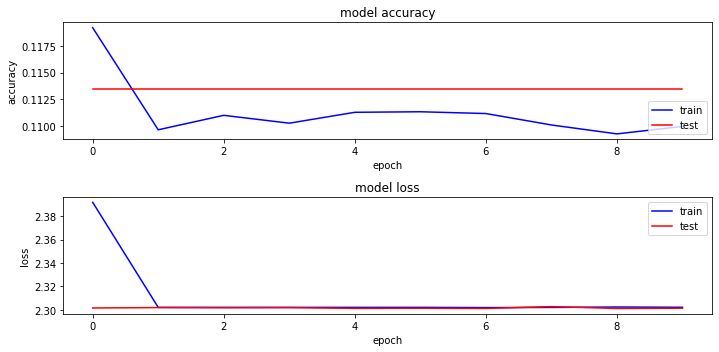

In [19]:
# plotting the metrics
fig = plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(train_process.train_acc, "b-")
plt.plot(train_process.val_acc, "r-")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(train_process.train_loss, "b-")
plt.plot(train_process.val_loss, "r-")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train'], loc='upper right')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

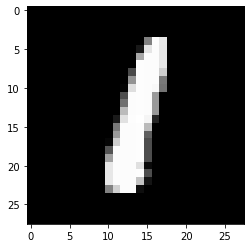

In [20]:
for x,y in test_loader:
    break
plt.imshow(x[0].squeeze().numpy(),'gray')

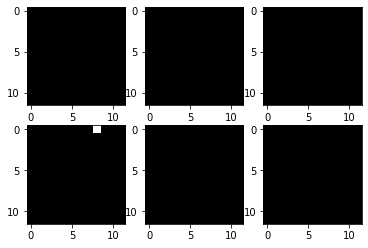

In [21]:
output = net.conv1(x[0].unsqueeze(dim=0).to(device))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(output[0][i].squeeze().detach().cpu().numpy(),'gray')